# BAF507 금융 데이터베이스-Exercise1

## 정회종(20214125)

## 2. pandas로 데이터 불러오기

In [1]:
import pandas as pd

In [4]:
df_samsung = pd.read_excel('data/samsung_stock_price.xlsx',skiprows=1)

In [5]:
df_samsung.tail()

,날짜,종목코드,기업명,주가 2000-2021
5418,2021-12-13T00:00:00,KRX:005930,삼성전자,76800
5419,2021-12-14T00:00:00,KRX:005930,삼성전자,77000
5420,2021-12-15T00:00:00,KRX:005930,삼성전자,77600
5421,2021-12-16T00:00:00,KRX:005930,삼성전자,77800
5422,2021-12-17T00:00:00,KRX:005930,삼성전자,78000


In [6]:
df_samsung.head()

,날짜,종목코드,기업명,주가 2000-2021
0,2000-01-04T00:00:00,KRX:005930,삼성전자,6110
1,2000-01-05T00:00:00,KRX:005930,삼성전자,5580
2,2000-01-06T00:00:00,KRX:005930,삼성전자,5620
3,2000-01-07T00:00:00,KRX:005930,삼성전자,5540
4,2000-01-10T00:00:00,KRX:005930,삼성전자,5770


In [7]:
df_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5423 entries, 0 to 5422
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   날짜            5423 non-null   object
 1   종목코드          5423 non-null   object
 2   기업명           5423 non-null   object
 3   주가 2000-2021  5423 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 169.6+ KB


In [8]:
df_samsung.describe()

,주가 2000-2021
count,5423.000000
mean,24315.902637
std,19265.281428
min,2730.000000
25%,10320.000000
50%,16580.000000
75%,30500.000000
max,91000.000000


## 3. convert date-string to a legitimate date type

In [10]:
df_samsung['날짜'][0]

'2000-01-04T00:00:00'

In [12]:
df_samsung.loc[0]['날짜']

'2000-01-04T00:00:00'

In [13]:
type(df_samsung.loc[0]['날짜'])

str

In [15]:
df_samsung['날짜']=pd.to_datetime(df_samsung['날짜'])

In [17]:
df_samsung.loc[0]['날짜']

Timestamp('2000-01-04 00:00:00')

In [18]:
type(df_samsung.loc[0]['날짜'])

pandas._libs.tslibs.timestamps.Timestamp

## 4. Replace index with date

In [19]:
df_samsung = df_samsung.set_index('날짜')

In [20]:
df_samsung.head(3)

,종목코드,기업명,주가 2000-2021
날짜,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620


In [22]:
df_samsung.loc['2000-01-04']

종목코드            KRX:005930
기업명                   삼성전자
주가 2000-2021          6110
Name: 2000-01-04 00:00:00, dtype: object

## 5. plot a time-series chart

In [23]:
import matplotlib.pyplot as plt

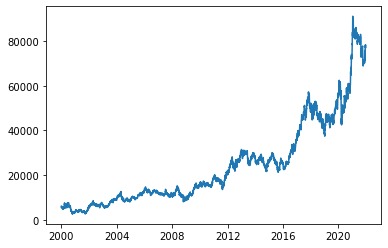

In [24]:
plt.plot(df_samsung['주가 2000-2021'])
plt.show()

## 일본 수출규제 발표후 2019년 6월 30일

In [26]:
df_sub = df_samsung.loc['2019-06-20':'2019-07-30']

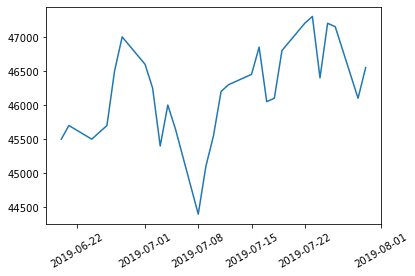

In [29]:
plt.plot(df_sub['주가 2000-2021'])
plt.xticks(rotation=30)
plt.show()

In [31]:
df_sub.loc['2019-06-30':].head(3)

,종목코드,기업명,주가 2000-2021
날짜,,,
2019-07-01,KRX:005930,삼성전자,46600
2019-07-02,KRX:005930,삼성전자,46250
2019-07-03,KRX:005930,삼성전자,45400


In [33]:
event = df_sub.loc['2019-06-30':].iloc[0]

In [34]:
event

종목코드            KRX:005930
기업명                   삼성전자
주가 2000-2021         46600
Name: 2019-07-01 00:00:00, dtype: object

In [35]:
event.name

Timestamp('2019-07-01 00:00:00')

In [36]:
event['주가 2000-2021']

46600

In [37]:
bbox = dict(boxstyle="round", fc="0.8")

In [38]:
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

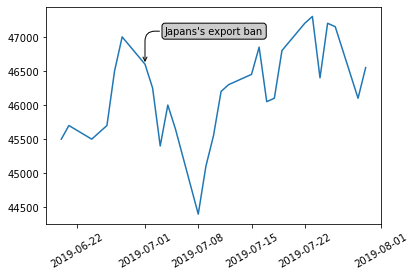

In [46]:
plt.plot(df_sub['주가 2000-2021'])
plt.xticks(rotation = 30)
plt.annotate(
    "Japans's export ban",
    xy = (event.name,event['주가 2000-2021']),
    xytext=(20,30),
    textcoords='offset points',
    arrowprops=arrowprops,
    bbox=bbox
)
plt.show()

## 6. Merge Samsung and LG stock prices together

In [47]:
df_lg = pd.read_excel('data/lg_stock_price.xlsx',skiprows=1)

In [48]:
df_lg['날짜'] = pd.to_datetime(df_lg['날짜'])

In [49]:
df_lg = df_lg.set_index('날짜')

In [50]:
df_lg.head()

,종목코드,기업명,주가 2000-2021
날짜,,,
2002-04-22,KRX:066570,LG전자,62936
2002-04-23,KRX:066570,LG전자,57463
2002-04-24,KRX:066570,LG전자,55704
2002-04-25,KRX:066570,LG전자,51209
2002-04-26,KRX:066570,LG전자,53554


## Rename columns

In [51]:
df_samsung = df_samsung.rename(
    columns={'주가 2000-2021':'samsung'}
)

In [52]:
df_samsung.head()

,종목코드,기업명,samsung
날짜,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620
2000-01-07,KRX:005930,삼성전자,5540
2000-01-10,KRX:005930,삼성전자,5770


In [56]:
#df_samsung['samsung'].to_frame() #series를 컬럼이 하나인 테이블로
df_samsung=df_samsung[['samsung']]

In [57]:
df_samsung

,samsung
날짜,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770
...,...
2021-12-13,76800
2021-12-14,77000
2021-12-15,77600


In [58]:
df_lg = df_lg.rename(
    columns={'주가 2000-2021':'lg'}
)

In [59]:
df_lg.head()

,종목코드,기업명,lg
날짜,,,
2002-04-22,KRX:066570,LG전자,62936
2002-04-23,KRX:066570,LG전자,57463
2002-04-24,KRX:066570,LG전자,55704
2002-04-25,KRX:066570,LG전자,51209
2002-04-26,KRX:066570,LG전자,53554


In [60]:
#df_samsung['samsung'].to_frame() #series를 컬럼이 하나인 테이블로
df_lg=df_lg[['lg']]

In [61]:
df_lg

,lg
날짜,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704
2002-04-25,51209
2002-04-26,53554
...,...
2021-12-13,134000
2021-12-14,128500
2021-12-15,129500


## Merge the two dataframes

In [68]:
df_merged = df_samsung.join(df_lg, how='left') #join은 index기준으로 join을 수행함. merge는 어떤 컬럼을 기준으로 하는지 적어줘야함 / left join

In [69]:
df_merged.head()

,samsung,lg
날짜,,
2000-01-04,6110,NaN
2000-01-05,5580,NaN
2000-01-06,5620,NaN
2000-01-07,5540,NaN
2000-01-10,5770,NaN


In [66]:
df_merged.tail()

,samsung,lg
날짜,,
2021-12-13,76800,134000.0
2021-12-14,77000,128500.0
2021-12-15,77600,129500.0
2021-12-16,77800,130000.0
2021-12-17,78000,129500.0


In [67]:
df_lg.head(3)

,lg
날짜,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704


## drop null values

In [71]:
df_merged = df_merged.dropna()

In [72]:
df_merged.head(3)

,samsung,lg
날짜,,
2002-04-22,8200,62936.0
2002-04-23,8540,57463.0
2002-04-24,8640,55704.0


## plot a time-series chart

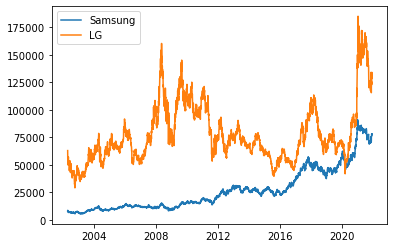

In [74]:
plt.plot(df_merged['samsung'],label='Samsung')
plt.plot(df_merged['lg'],label='LG')
plt.legend()
plt.show()

## normalize the stock prices

In [75]:
init = df_merged.iloc[0]

In [76]:
init

samsung     8200.0
lg         62936.0
Name: 2002-04-22 00:00:00, dtype: float64

In [77]:
df_merged['samsung_norm'] = df_merged['samsung'] / init.samsung * 100

In [78]:
df_merged['lg_norm'] = df_merged['lg'] / init.lg * 100

In [79]:
df_merged.head()

,samsung,lg,samsung_norm,lg_norm
날짜,,,,
2002-04-22,8200,62936.0,100.000000,100.000000
2002-04-23,8540,57463.0,104.146341,91.303864
2002-04-24,8640,55704.0,105.365854,88.508961
2002-04-25,8260,51209.0,100.731707,81.366785
2002-04-26,8000,53554.0,97.560976,85.092793


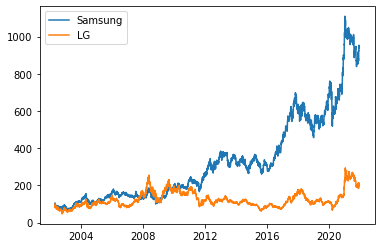

In [80]:
plt.plot(df_merged['samsung_norm'],label='Samsung')
plt.plot(df_merged['lg_norm'],label='LG')
plt.legend()
plt.show()

In [81]:
df_merged.tail(3)

,samsung,lg,samsung_norm,lg_norm
날짜,,,,
2021-12-15,77600,129500.0,946.341463,205.764586
2021-12-16,77800,130000.0,948.780488,206.559044
2021-12-17,78000,129500.0,951.219512,205.764586


## 잘못된 주가 예측

In [82]:
import statsmodels.api as sm

In [83]:
samsung = df_samsung['samsung']

In [84]:
samsung.head(5)

날짜
2000-01-04    6110
2000-01-05    5580
2000-01-06    5620
2000-01-07    5540
2000-01-10    5770
Name: samsung, dtype: int64

In [85]:
today = samsung.iloc[:-1]

In [86]:
tomorrow = samsung.iloc[1:]

In [87]:
X=sm.add_constant(today)

/Users/junghoij/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
X.head(3)

,const,samsung
날짜,,
2000-01-04,1.0,6110
2000-01-05,1.0,5580
2000-01-06,1.0,5620


In [90]:
model = sm.OLS(tomorrow,X.values)

In [91]:
result = model.fit()

In [92]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                samsung   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.619e+06
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:36:10   Log-Likelihood:                -41535.
No. Observations:                5422   AIC:                         8.307e+04
Df Residuals:                    5420   BIC:                         8.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4820     11.236      0.577      0.564     -15.545      28.509
x1             1.0003      0.000   2760.298      0.000       1.000       1.001
==============================================================================
Omnibus:                     1236.099   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26428.334
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                      13.759   Cond. No.                     4.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""